In [1]:
!pip install --upgrade pip           # upgrade pip to at least 20.3
!pip install "psycopg[binary]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.4 MB/s eta 0:00:0000:0100:01m


In [61]:
import psycopg

# Connect to an existing database
conn = psycopg.connect("host=host.docker.internal port='5432' dbname='postgres' user='postgres' password='secret' sslmode='prefer' connect_timeout='10'")

In [29]:
with conn.cursor() as cur:
    cur.execute("select club,sum(value) as clubvalue from fifa19 group by club order by clubvalue desc limit 10")
    rows = cur.fetchall()
    for row in rows:
        print("club:", row[0], ":", row[1])

club: Atlético Madrid : 1698450000
club: Inter : 1371020000
club: Arsenal : 1019900000
club: Real Madrid CF : 826700000
club: FC Bayern Munich : 748825000
club: FC Barcelona : 744500000
club: Milan : 695820000
club: Chelsea : 673085000
club: Paris Saint-Germain : 631750000
club: Manchester United : 625300000


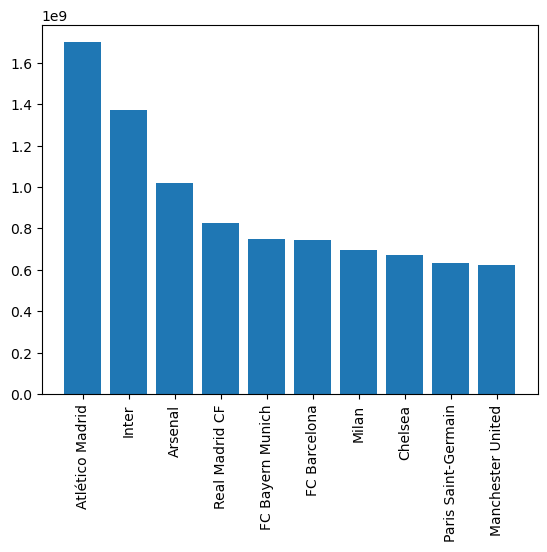

In [30]:
from pandas import DataFrame
import matplotlib.pyplot as plt
df = DataFrame(rows, columns=['Club','Value'] )
df = df.dropna()
plt.bar(df['Club'],df['Value'])
plt.xticks(rotation=90)
plt.show()

In [34]:
with conn.cursor() as cur:
    cur.execute("select country,sum(value) as clubvalue from fifa19 where country is not null group by country order by clubvalue desc limit 5")
    rows = cur.fetchall()
    for row in rows:
        print("club:", row[0], ":", row[1])

club: England : 6241050000
club: Spain : 5730070000
club: Germany : 4762780000
club: Italy : 4746200000
club: France : 2792990000


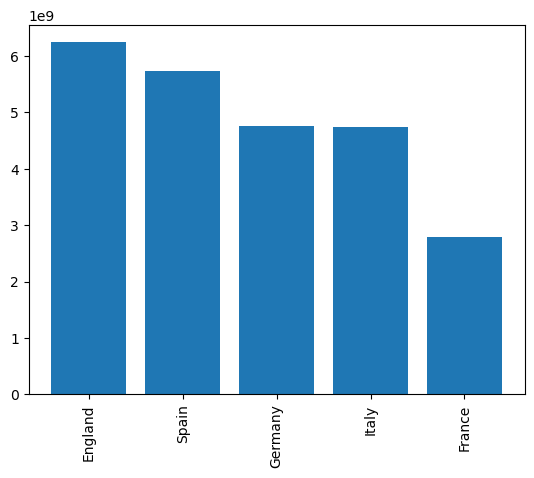

In [36]:
from pandas import DataFrame
import matplotlib.pyplot as plt
df = DataFrame(rows, columns=['Club','Value'] )
plt.bar(df['Club'],df['Value'])
plt.xticks(rotation=90)
plt.show()

In [62]:
with conn.cursor() as cur:
    cur.execute("select name,value from fifa19 order by value desc limit 5")
    rows = cur.fetchall()
    for row in rows:
        print("club:", row[0], ":", row[1])

club: Neymar : 123000000
club: L. Messi : 105000000
club: L. Suárez : 97000000
club: Cristiano Ronaldo : 95500000
club: R. Lewandowski : 92000000


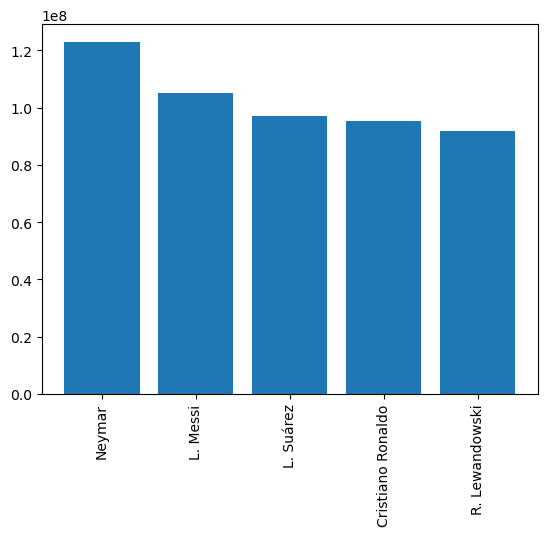

In [63]:
from pandas import DataFrame
import matplotlib.pyplot as plt
df = DataFrame(rows, columns=['Club','Value'] )
plt.bar(df['Club'],df['Value'])
plt.xticks(rotation=90)
plt.show()

In [51]:
from pathlib import Path
import pandas as pd

In [68]:
for file in Path.cwd().glob("*.csv"):
    df = pd.read_csv(file)

In [69]:
df = df.rename(columns=dict(zip(["Wage (€)","Value (€)"],["Wage","Value"])))

In [70]:
df

,Wage,Value,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,1000,50000,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,1000,0,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,1000,60000,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,1000,60000,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [83]:
df.columns

Index(['Wage', 'Value', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

<AxesSubplot:xlabel='Club'>

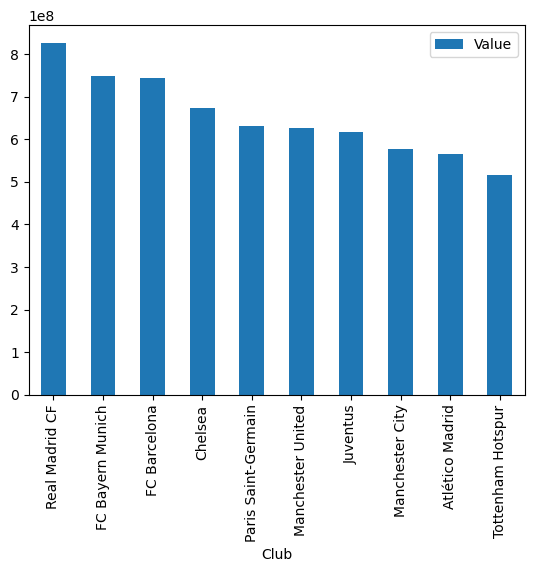

In [78]:
df[["Club","Value"]].groupby(["Club"]).sum("Value").sort_values(['Value'],ascending=False).head(10).plot(kind="bar")

<AxesSubplot:>

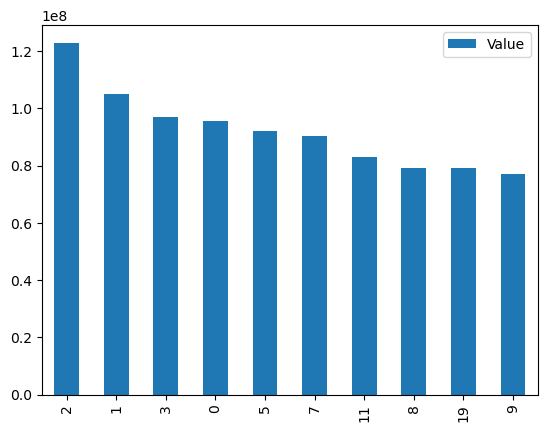

In [85]:
df[["Name","Value"]].sort_values(['Value'],ascending=False).head(10).plot(kind="bar")